# ROMY Events - Data

In [1]:
import os
import obspy as obs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
if os.uname().nodename == 'lighthouse':
    root_path = '/home/andbro/'
    data_path = '/home/andbro/kilauea-data/'
    archive_path = '/home/andbro/freenas/'
    bay_path = '/home/andbro/bay200/'
elif os.uname().nodename == 'kilauea':
    root_path = '/home/brotzer/'
    data_path = '/import/kilauea-data/'
    archive_path = '/import/freenas-ffb-01-data/'
    bay_path = '/bay200/'
elif os.uname().nodename == 'lin-ffb-01':
    root_path = '/home/brotzer/'
    data_path = '/import/kilauea-data/'
    archive_path = '/import/freenas-ffb-01-data/'
    bay_path = '/bay200/'

### Configurations

In [3]:
config = {}

# path to data
config['path_to_data'] = data_path+"romy_events/data/"

config['path_to_figs'] = data_path+"romy_events/figures/"

# specify event file
config['eventfile'] = "ROMYevents_2020_2023_status.csv"

# specify catalog
config['catalogfile'] = "catalogs/ROMY_global_catalog_20200101_20231231.pkl"

# ROMY coordinates
config['sta_lon'] = 11.275501
config['sta_lat'] = 48.162941


### Load Catalog

In [4]:
cat = pd.read_pickle(config['path_to_data']+config['catalogfile'])

# add row with UTC times
cat['time_utc'] = [str(obs.UTCDateTime(str(_e).split('.')[0], precision=0)) for _e in cat.timestamp]

cat['depth_km'] = cat.depth / 1000

In [5]:
cat

,timestamp,latitude,longitude,depth,magnitude,type,seconds,backazimuth,distances_km,time_utc,depth_km
0,2020-01-06 10:32:19.160,17.7486,-66.8286,8079.8,5.95,mb,0.000000e+00,273.611213,7683.547502,2020-01-06T10:32:19Z,8.0798
1,2020-01-07 06:05:19.680,2.3273,96.4130,20388.2,6.02,mb,7.038052e+04,91.926528,9456.374129,2020-01-07T06:05:19Z,20.3882
2,2020-01-07 08:24:25.120,17.8096,-66.7908,7922.0,6.27,mb,7.872596e+04,273.629169,7675.920763,2020-01-07T08:24:25Z,7.9220
3,2020-01-09 08:38:08.890,62.2654,171.0078,8959.8,5.97,mb,2.523497e+05,9.987013,7629.287864,2020-01-09T08:38:08Z,8.9598
4,2020-01-19 13:27:57.850,39.7669,77.1324,10361.2,5.78,mb,1.133739e+06,74.622163,5202.291787,2020-01-19T13:27:57Z,10.3612
...,...,...,...,...,...,...,...,...,...,...,...
1100,2023-12-20 12:11:22.030,-16.0280,-72.5450,94900.0,6.00,M,1.247675e+08,254.883009,10872.229523,2023-12-20T12:11:22Z,94.9000
1101,2023-12-23 17:48:05.220,52.0190,159.0030,36100.0,5.98,M,1.250469e+08,19.778726,8487.701245,2023-12-23T17:48:05Z,36.1000
1102,2023-12-28 09:15:18.470,44.5560,148.9440,45900.0,6.50,M,1.254482e+08,29.127618,8935.182118,2023-12-28T09:15:18Z,45.9000
1103,2023-12-28 09:37:27.210,44.4540,149.1610,38000.0,6.36,M,1.254495e+08,29.034678,8953.123325,2023-12-28T09:37:27Z,38.0000


### Load Event Data

In [6]:
# load data base
events = pd.read_csv(config['path_to_data']+config['eventfile'], header=0, skiprows=4)

# prepare dataframe
events.dropna(subset="Event", inplace=True)
events.sort_values(by="# Event")
events.reset_index(drop=True, inplace=True)

# add row with UTC times
events['time_utc'] = [str(obs.UTCDateTime(f"{_e.split('_')[1]}T{_e.split('_')[2]}", precision=0)) for _e in events.Event]

events

,# Event,Event,FUR,RLAS,ROMY-Z,ROMY-U,ROMY-V,ROMY-W,FURQ,RLASQ,ZQ,UQ,VQ,WQ,Comment,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,time_utc
0,0.0,000_20200107_060519_filtered.png,True,True,False,False,False,False,False,False,False,False,False,False,NaN,0.0,20200107.0,60519.0,filtered.png,2020-01-07T06:05:19Z
1,1.0,001_20200107_082425_filtered.png,True,True,False,False,False,False,False,False,False,False,False,False,NaN,1.0,20200107.0,82425.0,filtered.png,2020-01-07T08:24:25Z
2,2.0,002_20200119_165820_filtered.png,True,True,False,False,False,False,False,False,False,False,False,False,NaN,2.0,20200119.0,165820.0,filtered.png,2020-01-19T16:58:20Z
3,3.0,003_20200120_065138_filtered.png,True,False,False,False,False,False,False,False,False,False,False,False,NaN,3.0,20200120.0,65138.0,filtered.png,2020-01-20T06:51:38Z
4,4.0,004_20200124_175515_filtered.png,True,True,True,True,False,False,False,False,False,True,False,False,Z coda incomplete,4.0,20200124.0,175515.0,filtered.png,2020-01-24T17:55:15Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,423.0,423_20231211_063331_filtered.png,False,False,False,False,False,False,False,False,False,False,False,False,NaN,423.0,20231211.0,63331.0,filtered.png,2023-12-11T06:33:31Z
424,424.0,424_20231211_063331_filtered.png,False,False,False,False,False,False,False,False,False,False,False,False,NaN,424.0,20231211.0,63331.0,filtered.png,2023-12-11T06:33:31Z
425,425.0,425_20231228_091518_filtered.png,True,True,True,True,True,False,False,False,True,True,True,False,"Z interrupted at start, U interrupted, V inte...",425.0,20231228.0,91518.0,filtered.png,2023-12-28T09:15:18Z
426,426.0,426_20231228_093727_filtered.png,True,True,True,True,True,False,False,False,True,True,True,False,"Z interrupted at start, U interrupted, V inte...",426.0,20231228.0,93727.0,filtered.png,2023-12-28T09:37:27Z


### Merge Dataframes

In [7]:
df = pd.merge(left=cat, right=events, on="time_utc")

In [8]:
df

,timestamp,latitude,longitude,depth,magnitude,type,seconds,backazimuth,distances_km,time_utc,...,RLASQ,ZQ,UQ,VQ,WQ,Comment,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,2020-01-07 06:05:19.680,2.3273,96.4130,20388.2,6.02,mb,7.038052e+04,91.926528,9456.374129,2020-01-07T06:05:19Z,...,False,False,False,False,False,NaN,0.0,20200107.0,60519.0,filtered.png
1,2020-01-07 08:24:25.120,17.8096,-66.7908,7922.0,6.27,mb,7.872596e+04,273.629169,7675.920763,2020-01-07T08:24:25Z,...,False,False,False,False,False,NaN,1.0,20200107.0,82425.0,filtered.png
2,2020-01-19 16:58:20.270,-0.0922,123.7908,134364.4,6.04,mb,1.146361e+06,72.743117,11667.078041,2020-01-19T16:58:20Z,...,False,False,False,False,False,NaN,2.0,20200119.0,165820.0,filtered.png
3,2020-01-20 06:51:38.360,-59.3480,-26.3762,103227.9,6.28,mb,1.196359e+06,199.669607,12400.384022,2020-01-20T06:51:38Z,...,False,False,False,False,False,NaN,3.0,20200120.0,65138.0,filtered.png
4,2020-01-24 17:55:15.540,38.2987,39.1475,12303.2,6.15,mb,1.581776e+06,105.672138,2496.661360,2020-01-24T17:55:15Z,...,False,False,True,False,False,Z coda incomplete,4.0,20200124.0,175515.0,filtered.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,2023-12-11 06:33:31.900,-18.9340,-175.5060,245000.0,6.20,M,1.239697e+08,12.888509,16704.989259,2023-12-11T06:33:31Z,...,False,False,False,False,False,NaN,423.0,20231211.0,63331.0,filtered.png
436,2023-12-11 06:33:31.900,-18.9340,-175.5060,245000.0,6.20,M,1.239697e+08,12.888509,16704.989259,2023-12-11T06:33:31Z,...,False,False,False,False,False,NaN,424.0,20231211.0,63331.0,filtered.png
437,2023-12-28 09:15:18.470,44.5560,148.9440,45900.0,6.50,M,1.254482e+08,29.127618,8935.182118,2023-12-28T09:15:18Z,...,False,True,True,True,False,"Z interrupted at start, U interrupted, V inte...",425.0,20231228.0,91518.0,filtered.png
438,2023-12-28 09:37:27.210,44.4540,149.1610,38000.0,6.36,M,1.254495e+08,29.034678,8953.123325,2023-12-28T09:37:27Z,...,False,True,True,True,False,"Z interrupted at start, U interrupted, V inte...",426.0,20231228.0,93727.0,filtered.png


In [9]:
df.keys()

Index(['timestamp', 'latitude', 'longitude', 'depth', 'magnitude', 'type',
       'seconds', 'backazimuth', 'distances_km', 'time_utc', 'depth_km',
       '# Event', 'Event', 'FUR', 'RLAS', 'ROMY-Z', 'ROMY-U', 'ROMY-V',
       'ROMY-W', 'FURQ', 'RLASQ', 'ZQ', 'UQ', 'VQ', 'WQ', 'Comment',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18'],
      dtype='object')

### Select events with RLAS and ROMY-Z

In [10]:
select_z_idx = list(np.where((df.RLAS == True) & (df['ROMY-Z'] == True) & (df.ZQ == False))[0])

select_z = df[df.index.isin(select_z_idx)]

In [11]:
select_z

,timestamp,latitude,longitude,depth,magnitude,type,seconds,backazimuth,distances_km,time_utc,...,RLASQ,ZQ,UQ,VQ,WQ,Comment,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
4,2020-01-24 17:55:15.540,38.2987,39.1475,12303.2,6.15,mb,1.581776e+06,105.672138,2496.661360,2020-01-24T17:55:15Z,...,False,False,True,False,False,Z coda incomplete,4.0,20200124.0,175515.0,filtered.png
14,2020-05-02 12:51:05.870,34.1862,25.7680,13468.2,6.43,mb,1.011713e+07,136.885653,1964.844686,2020-05-02T12:51:05Z,...,False,False,False,False,False,NaN,14.0,20200502.0,125105.0,filtered.png
28,2020-07-22 20:07:18.730,33.0824,86.8385,10000.0,6.20,mb,1.714170e+07,75.534793,6341.853307,2020-07-22T20:07:18Z,...,False,False,False,False,False,NaN,28.0,20200722.0,200718.0,filtered.png
36,2020-09-01 04:09:28.400,-27.9890,-71.1737,16693.5,6.40,mb,2.062663e+07,245.646435,11748.735840,2020-09-01T04:09:28Z,...,False,False,False,False,False,NaN,36.0,20200901.0,40928.0,filtered.png
38,2020-09-06 06:51:18.630,7.6300,-37.2557,11851.5,6.18,mb,2.106834e+07,241.810156,6394.083290,2020-09-06T06:51:18Z,...,False,False,False,False,False,NaN,38.0,20200906.0,65118.0,filtered.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,2023-10-31 12:33:45.010,-28.7230,-71.3850,38700.0,6.70,M,1.204489e+08,245.260571,11821.894915,2023-10-31T12:33:45Z,...,False,False,False,False,False,NaN,405.0,20231031.0,123345.0,filtered.png
421,2023-12-02 15:00:09.380,8.6830,126.8850,38400.0,6.63,M,1.232225e+08,64.694732,11123.408162,2023-12-02T15:00:09Z,...,False,False,False,False,False,NaN,411.0,20231202.0,150009.0,filtered.png
422,2023-12-02 15:06:47.330,8.4440,126.9490,40000.0,7.40,M,1.232229e+08,64.791279,11148.636359,2023-12-02T15:06:47Z,...,False,False,False,False,False,NaN,412.0,20231202.0,150647.0,filtered.png
423,2023-12-02 15:31:28.240,8.5890,126.8690,40000.0,6.89,M,1.232243e+08,64.765433,11130.560323,2023-12-02T15:31:28Z,...,False,False,False,False,False,NaN,413.0,20231202.0,153128.0,filtered.png


### Pick maximal Amplitudes in Fband

In [283]:
def __get_event_window(st0, deltaT1=60, deltaT2=1000, plot=False):

    from obspy.signal.trigger import coincidence_trigger
    from obspy.signal.trigger import recursive_sta_lta
    from obspy.signal.trigger import plot_trigger

    st_trig = obs.Stream()
    st_trig += st0.select(station="FUR", channel="*Z").copy()
    st_trig += st0.select(station="FUR", channel="*N").copy()
    st_trig += st0.select(station="FUR", channel="*E").copy()
    st_trig += st0.select(station="ROMY", channel="*Z").copy()

    st_trig = st_trig.detrend("demean")
    st_trig = st_trig.filter("bandpass", freqmin=0.01, freqmax=0.1, corners=4, zerophase=True)

    df = st_trig[0].stats.sampling_rate

    sta = 10 # seconds
    lta = 180 # seconds

    thr_on = 4
    thr_off = 0.1

    # cft = recursive_sta_lta(st_trig[3].data, int(sta * df), int(lta * df))
    # plot_trigger(st_trig[3], cft, thr_on, thr_off)

    trig = coincidence_trigger("recstalta", thr_on, thr_off, st_trig, 4, sta=sta, lta=lta, details=True, similarity_threshold=0.)

    t1 = trig[0]['time'] - deltaT1
    t2 = trig[0]['time'] + trig[0]['duration'] + deltaT2

    if plot:

        Nrow, Ncol = len(st_trig), 1

        font = 12

        fig, ax = plt.subplots(Nrow, Ncol, figsize=(15, 8), sharex=True)

        plt.subplots_adjust(hspace=0)

        for _k, tr in enumerate(st_trig):

            if "ROMY" in tr.stats.station:
                ax[_k].plot(tr.times(), tr.data*1e9, color="k", label=f"{tr.stats.station}.{tr.stats.channel}")
            else:
                ax[_k].plot(tr.times(), tr.data*1e6, color="k", label=f"{tr.stats.station}.{tr.stats.channel}")

            ax[_k].axvline(trig[0]['time']-tr.stats.starttime - deltaT1, -10, 10)
            ax[_k].axvline(trig[0]['time']-tr.stats.starttime + trig[0]['duration'] + deltaT2, -10, 10)


        for _n in range(Nrow):
            ax[_n].grid(ls=":", zorder=0)
            ax[_n].legend(loc=1)

        plt.show();


    return t1, t2

In [284]:
def __get_fband_maxima(st0, fmin, fmax, t1, t2, plot=False):

    st_amp = obs.Stream()
    st_amp += st0.select(station="FUR", channel="*Z").copy()
    st_amp += st0.select(station="FUR", channel="*N").copy()
    st_amp += st0.select(station="FUR", channel="*E").copy()
    st_amp += st0.select(station="ROMY",channel="*Z").copy()
    st_amp += st0.select(station="RLAS",channel="*Z").copy()

    st_amp = st_amp.trim(t1, t2)
    st_amp = st_amp.detrend("demean")

    from functions.get_octave_bands import __get_octave_bands

    flower, fupper, fcenter = __get_octave_bands(fmin, fmax, faction_of_octave=12, plot=False)

    out = {}
    for fl, fu, fc in zip(flower, fupper, fcenter):

        out[fc] = {}

        stx = st_amp.copy()

        stx = stx.taper(0.01)
        stx = stx.filter("bandpass", freqmin=fl, freqmax=fu, corners=4, zerophase=True)
        stx = stx.detrend("demean")

        for tr in stx:
            name = f"{tr.stats.station}.{tr.stats.channel}"
            out[fc][name] = np.max(abs(tr.data))

    if plot:

        plt.figure(figsize=(15, 5))
        for _i, fc in enumerate(out.keys()):

            if _i == 0:
                plt.scatter(fc, out[fc]["ROMY.BJZ"], color="tab:blue", edgecolor="k", label="ROMY", zorder=2)
                plt.scatter(fc, out[fc]["RLAS.BJZ"], color="tab:orange", edgecolor="k", label="RLAS", zorder=2)
            else:
                plt.scatter(fc, out[fc]["ROMY.BJZ"], color="tab:blue", edgecolor="k", zorder=2)
                plt.scatter(fc, out[fc]["RLAS.BJZ"], color="tab:orange", edgecolor="k", zorder=2)

        plt.xscale("log")
        plt.yscale("log")
        plt.grid(which="both", zorder=0, alpha=0.5, color="grey")
        plt.legend(loc=2)
        plt.xlabel("Frequency (Hz)")
        plt.ylabel("Amplitude (rad/s)")
        plt.show();

    return out

In [12]:
config['path_to_mseed'] = data_path+"romy_events/data/waveforms/ACC/"

004_20200124_175515.mseed


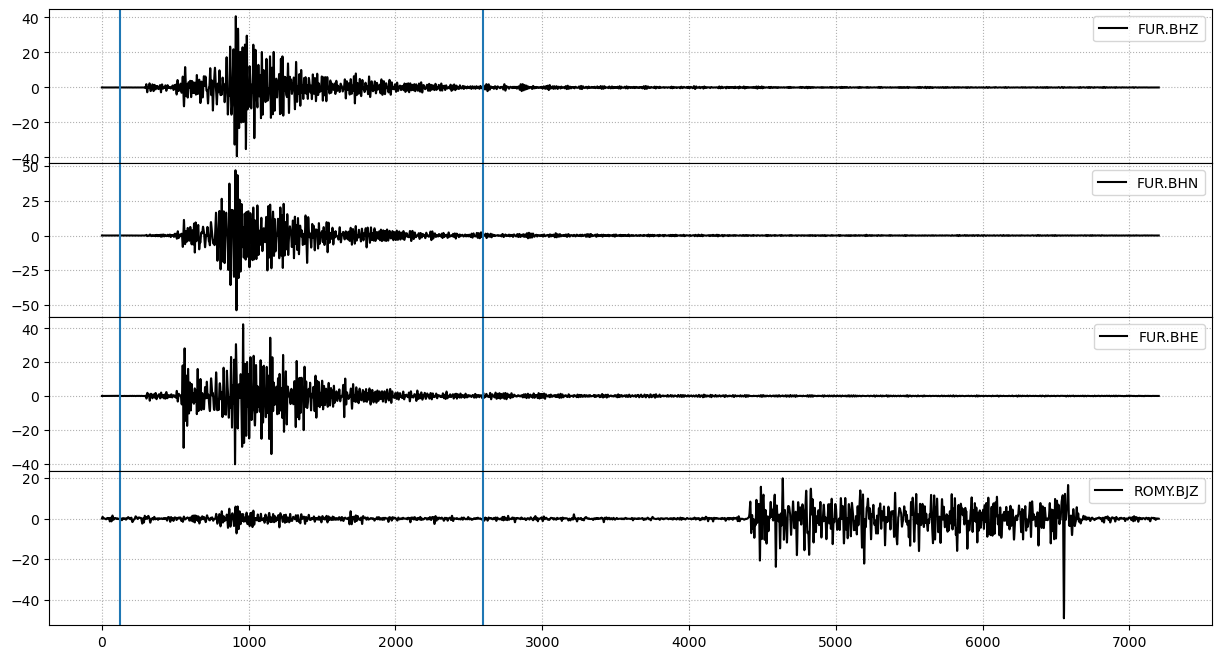

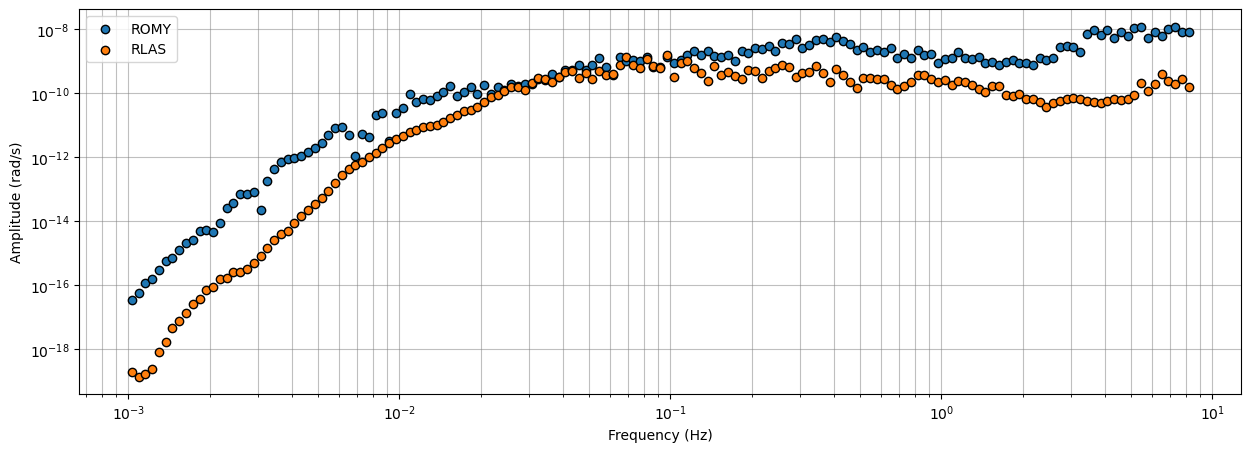

014_20200502_125105.mseed


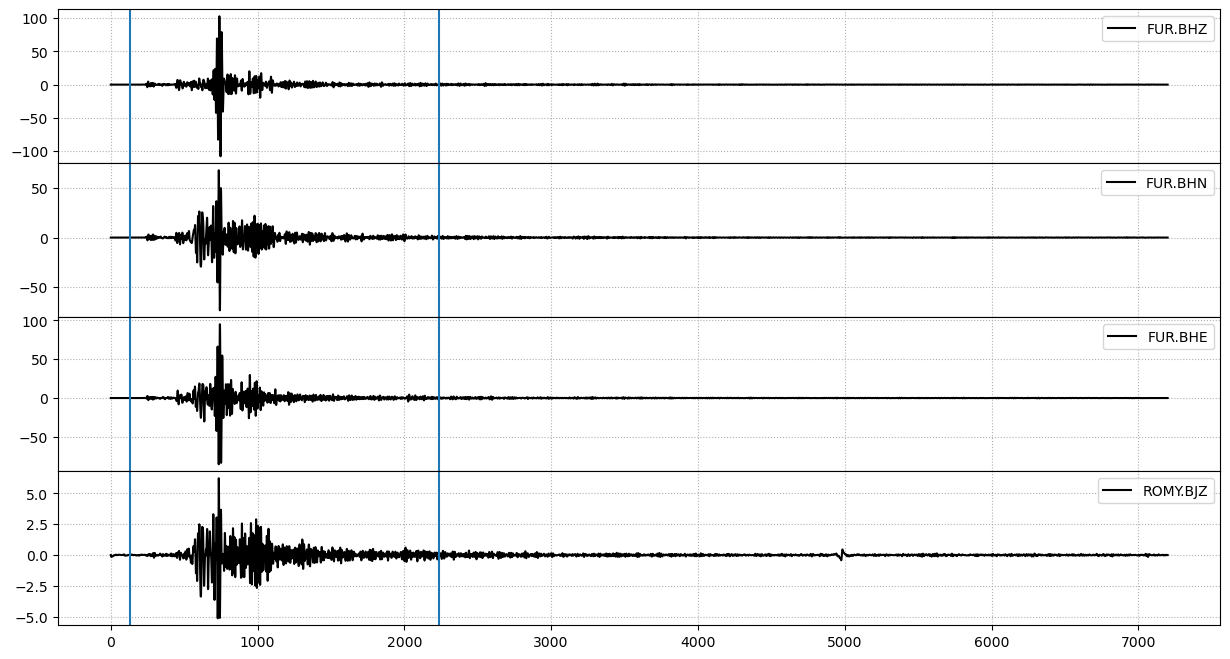

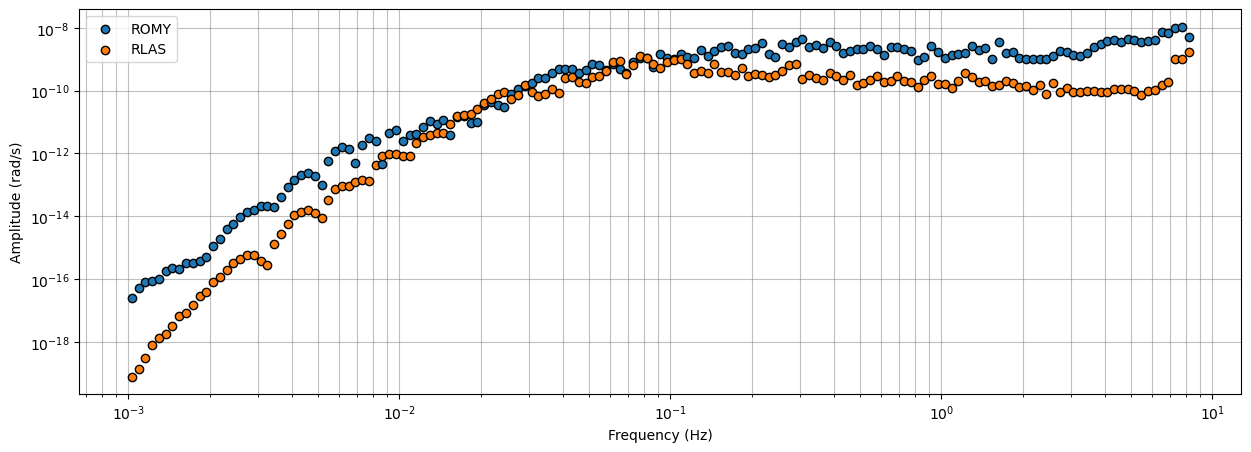

028_20200722_200718.mseed


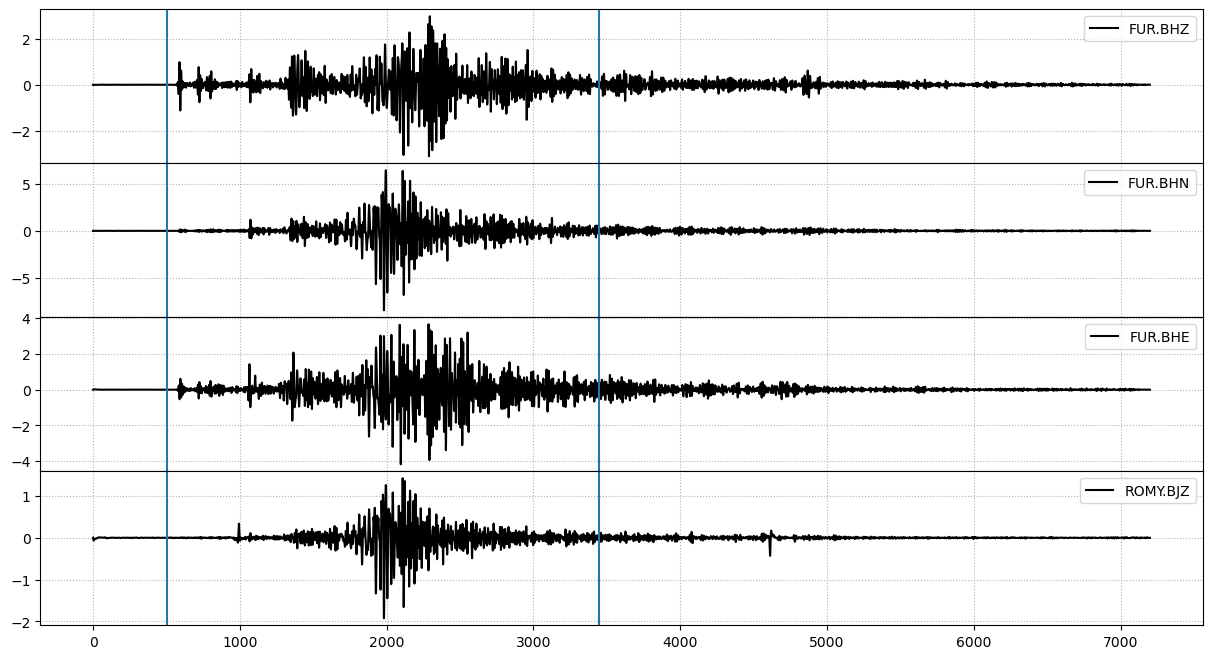

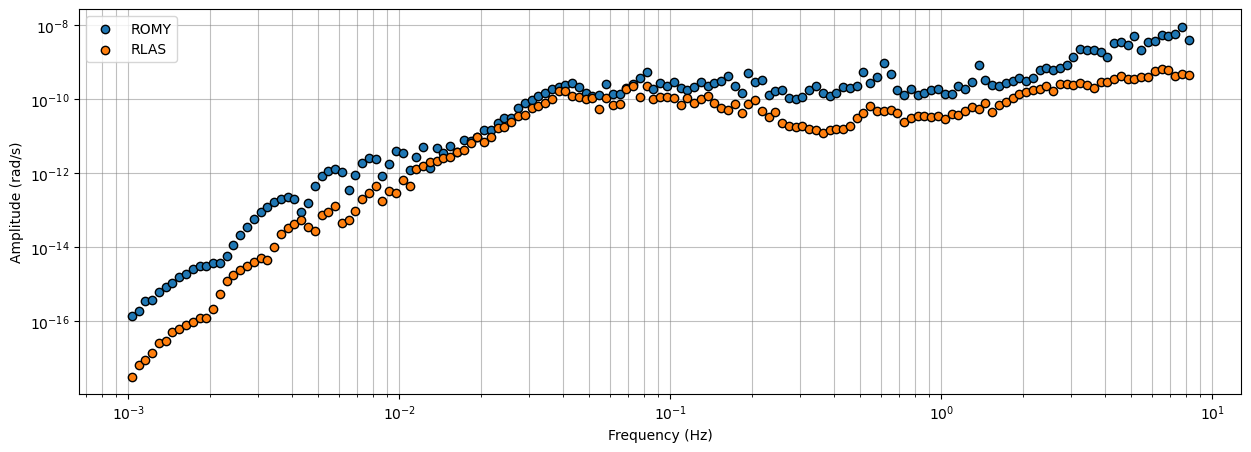

036_20200901_040928.mseed


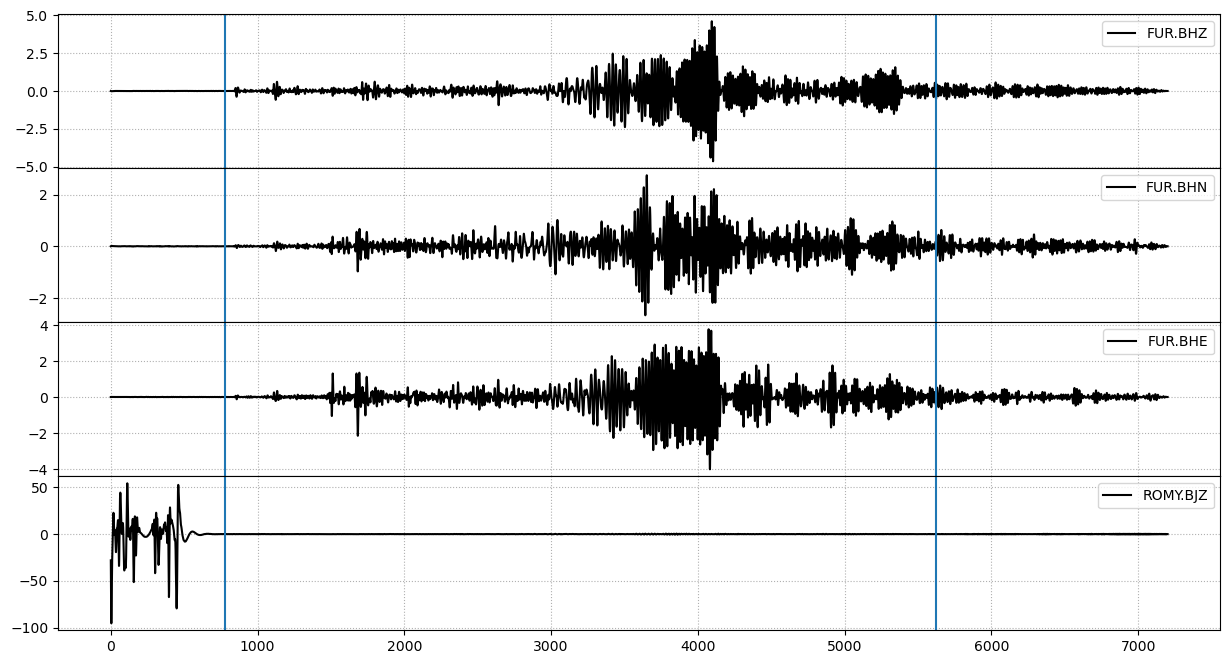

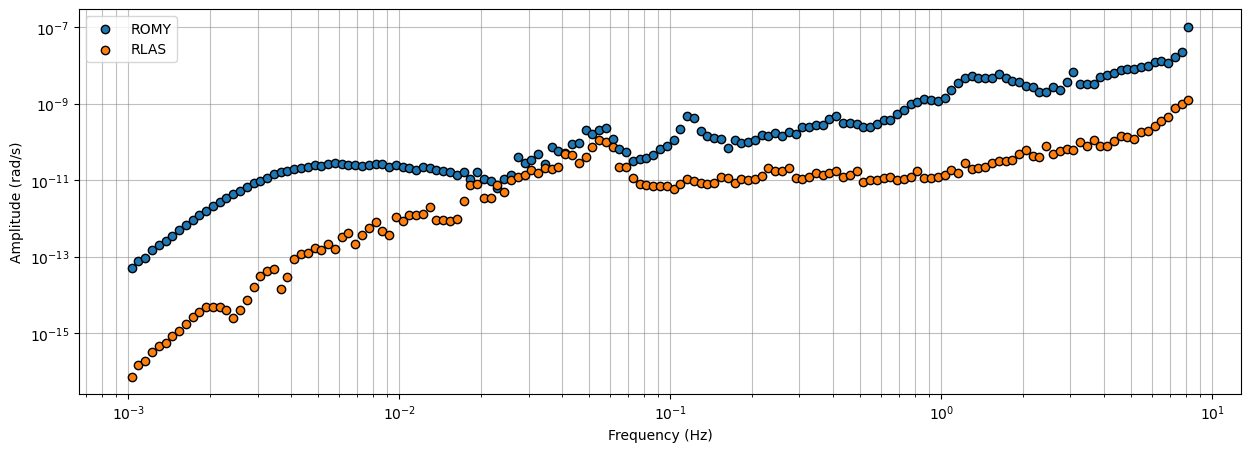

038_20200906_065118.mseed


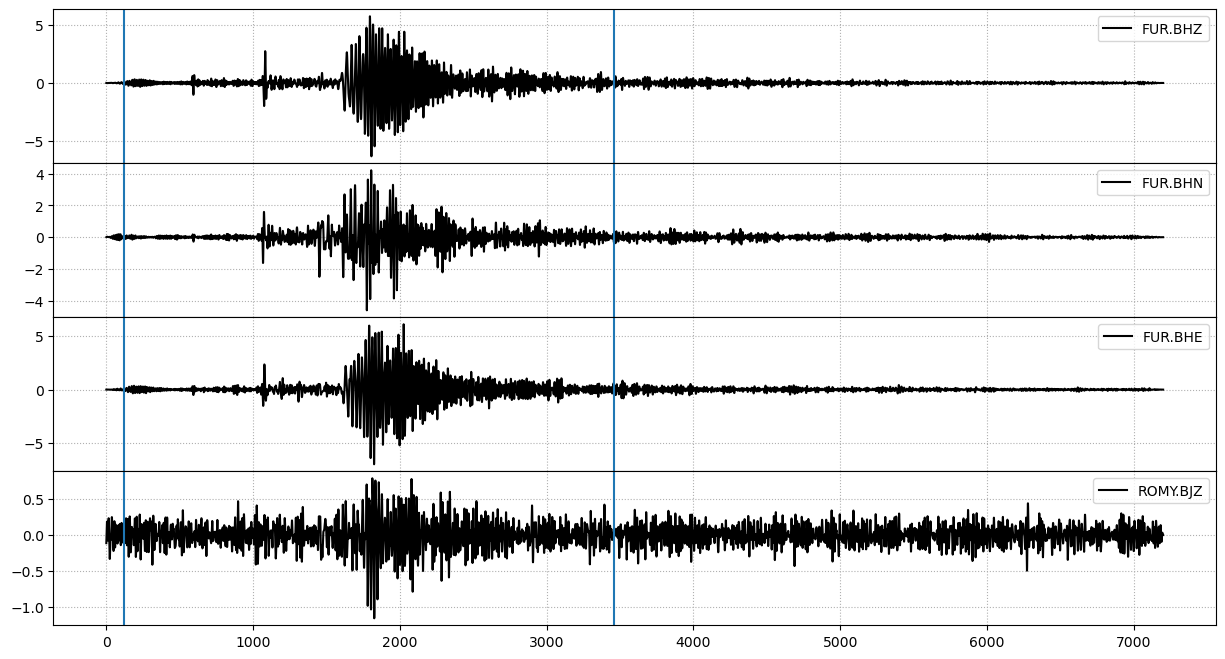

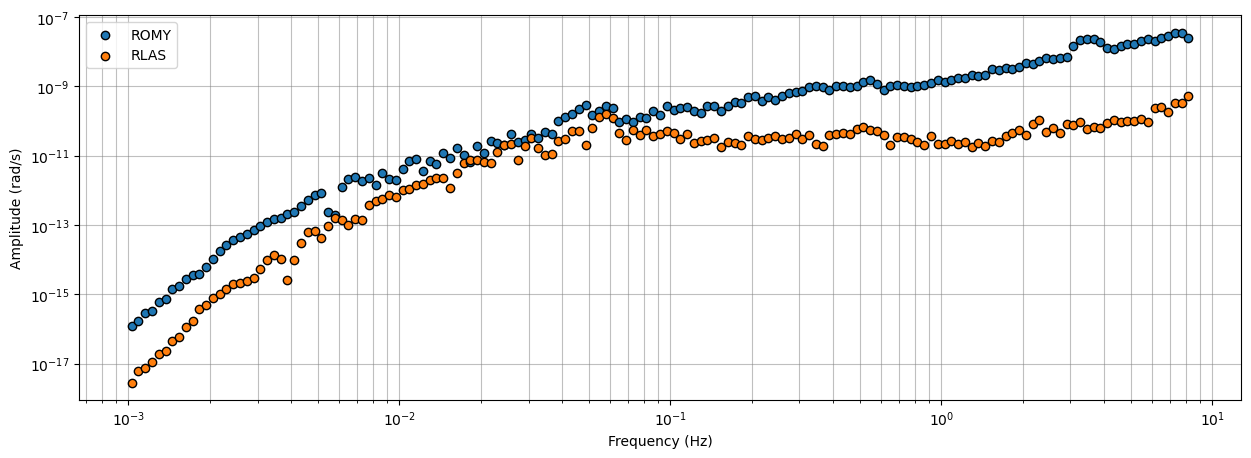

041_20200918_214357.mseed


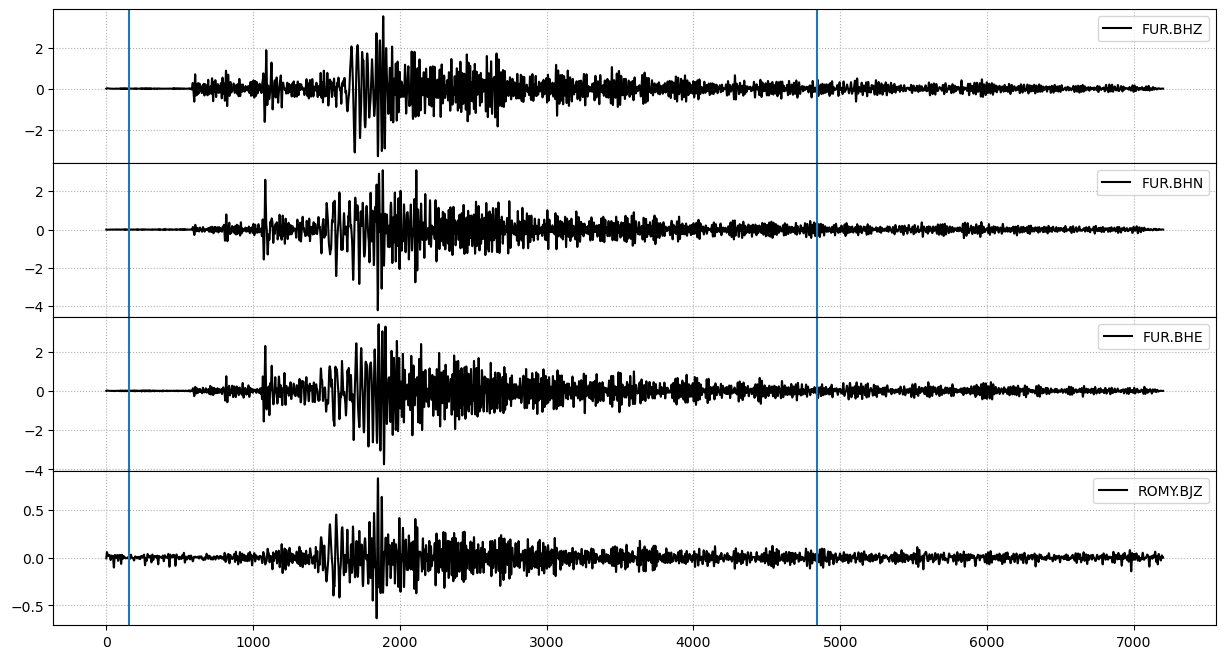

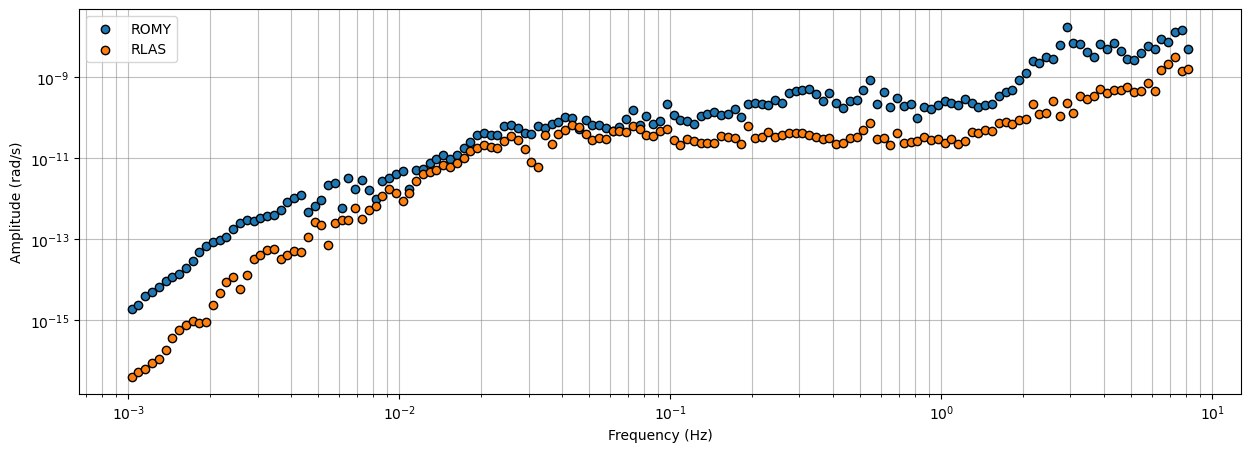

062_20210210_131957.mseed


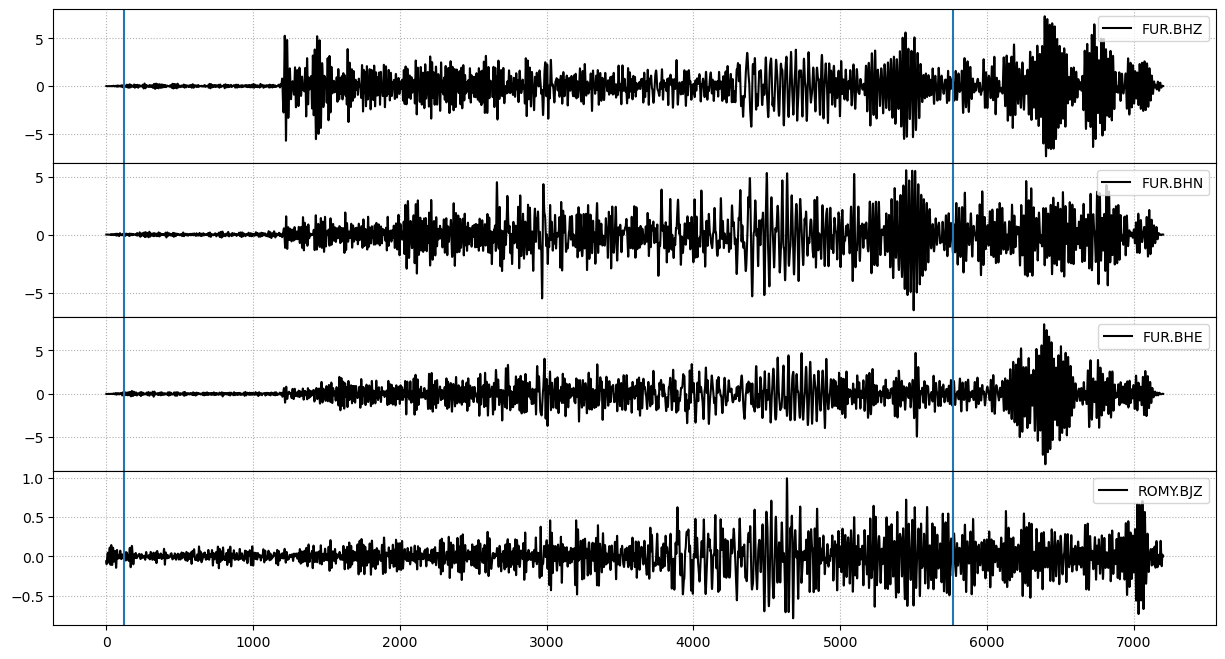

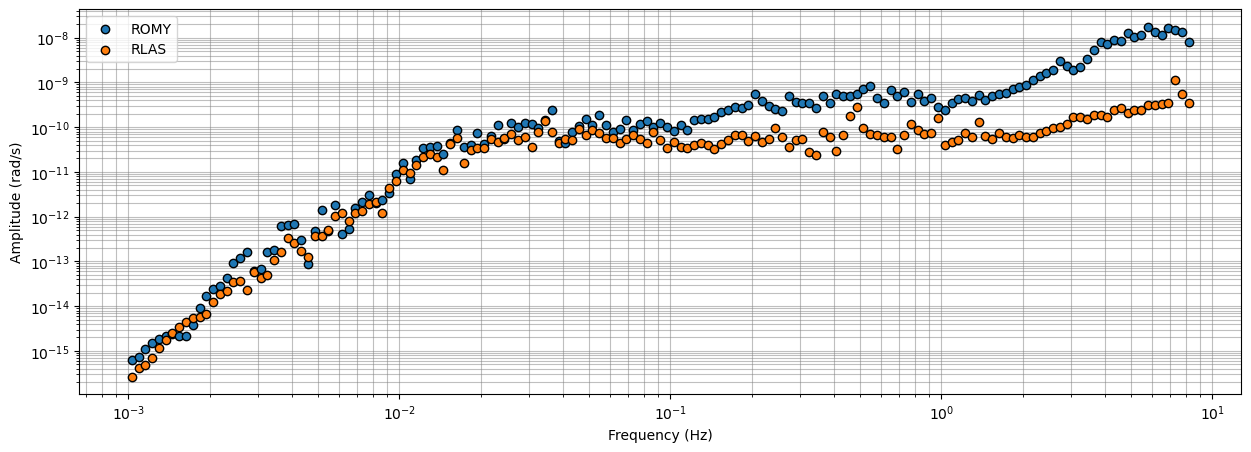

065_20210213_140750.mseed


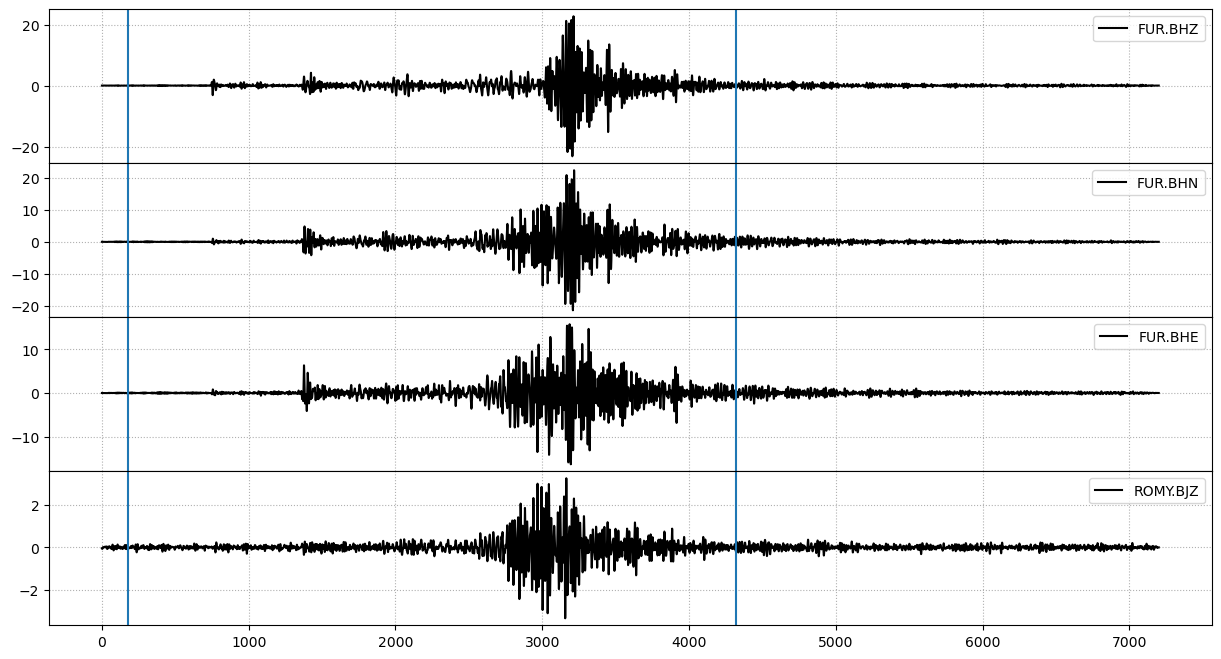

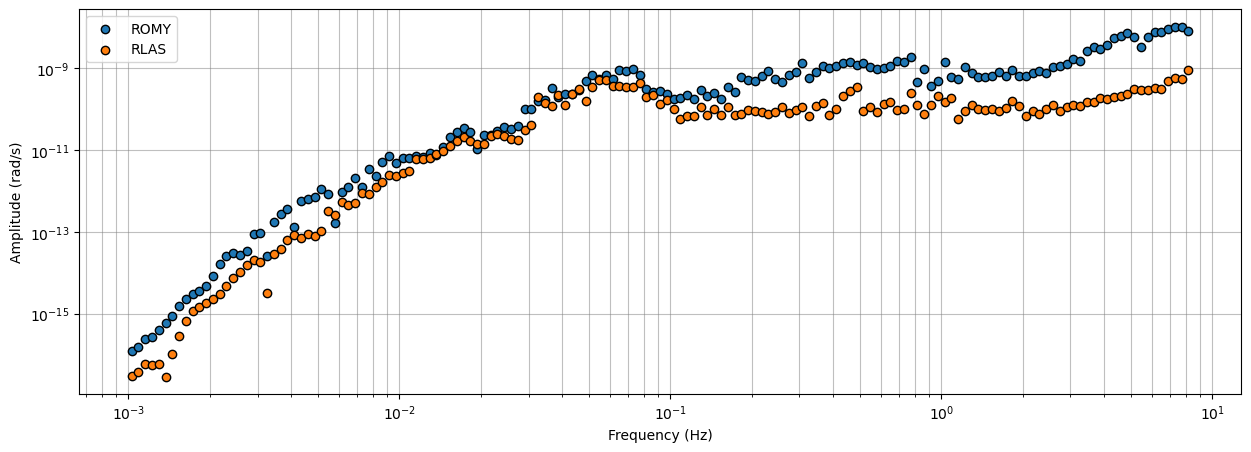

067_20210304_132736.mseed


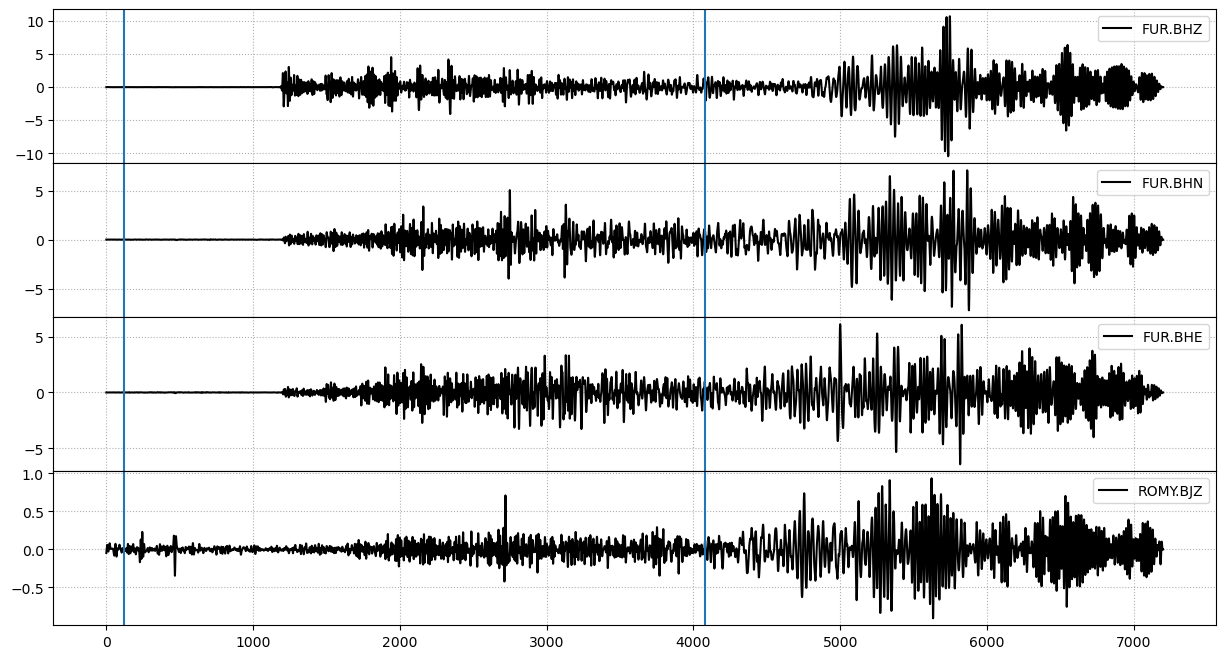

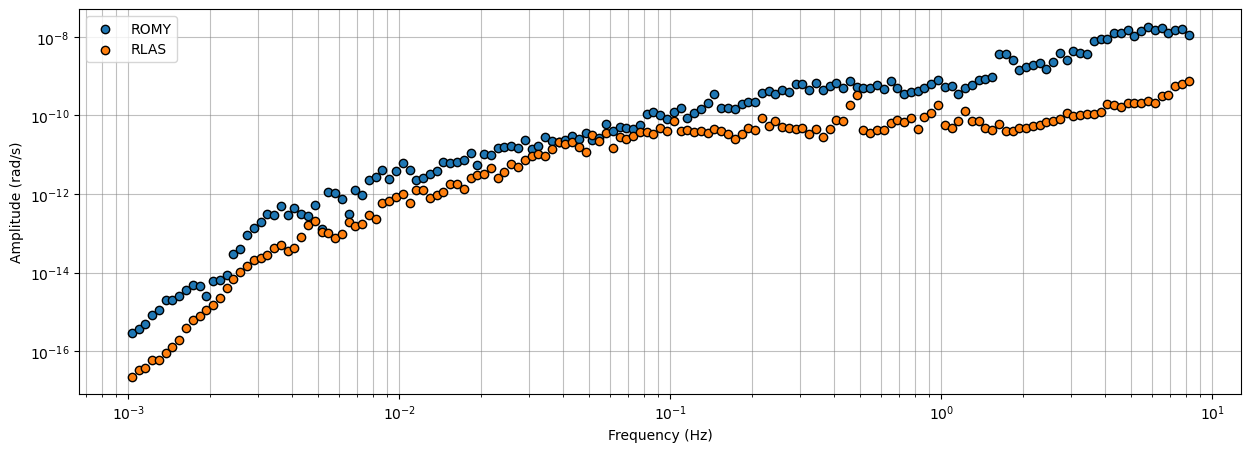

068_20210304_174123.mseed


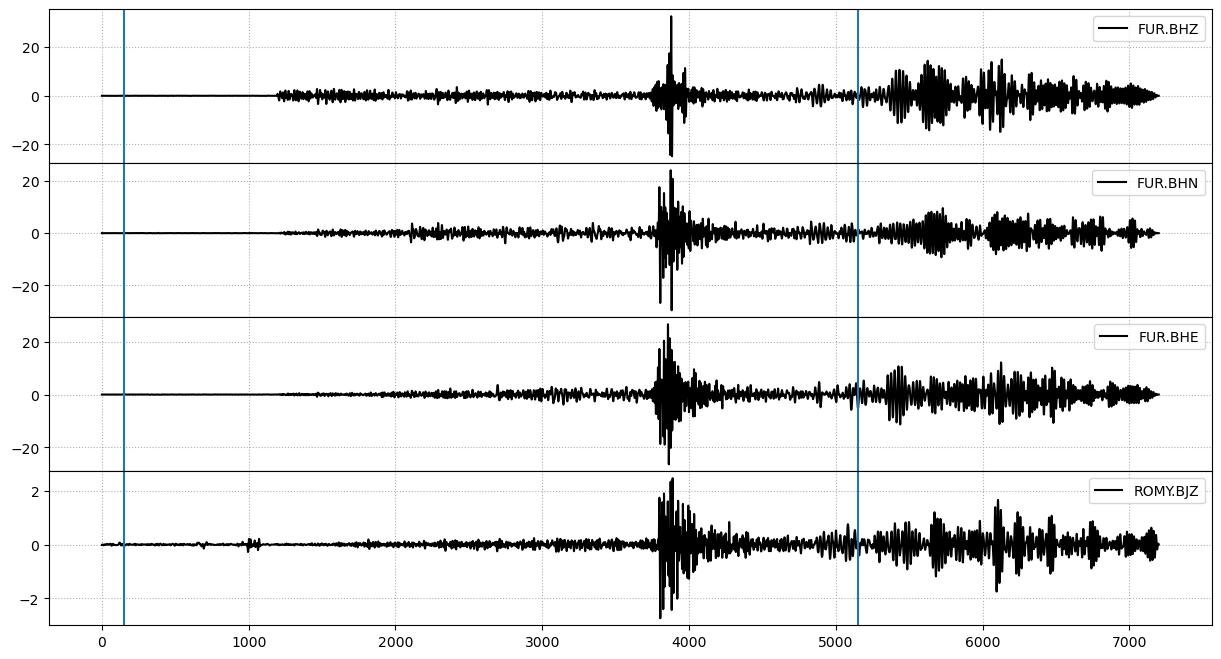

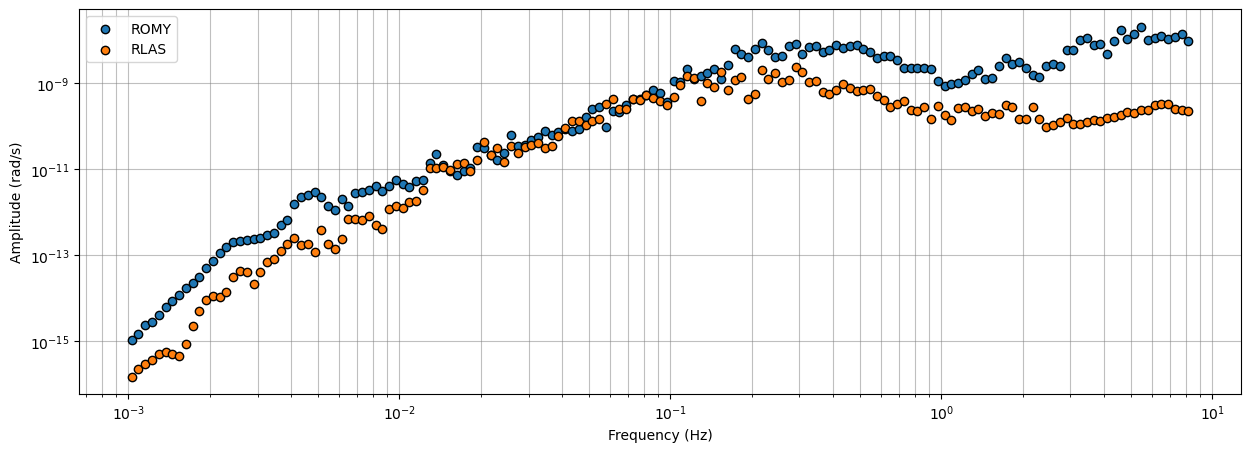

069_20210304_192834.mseed


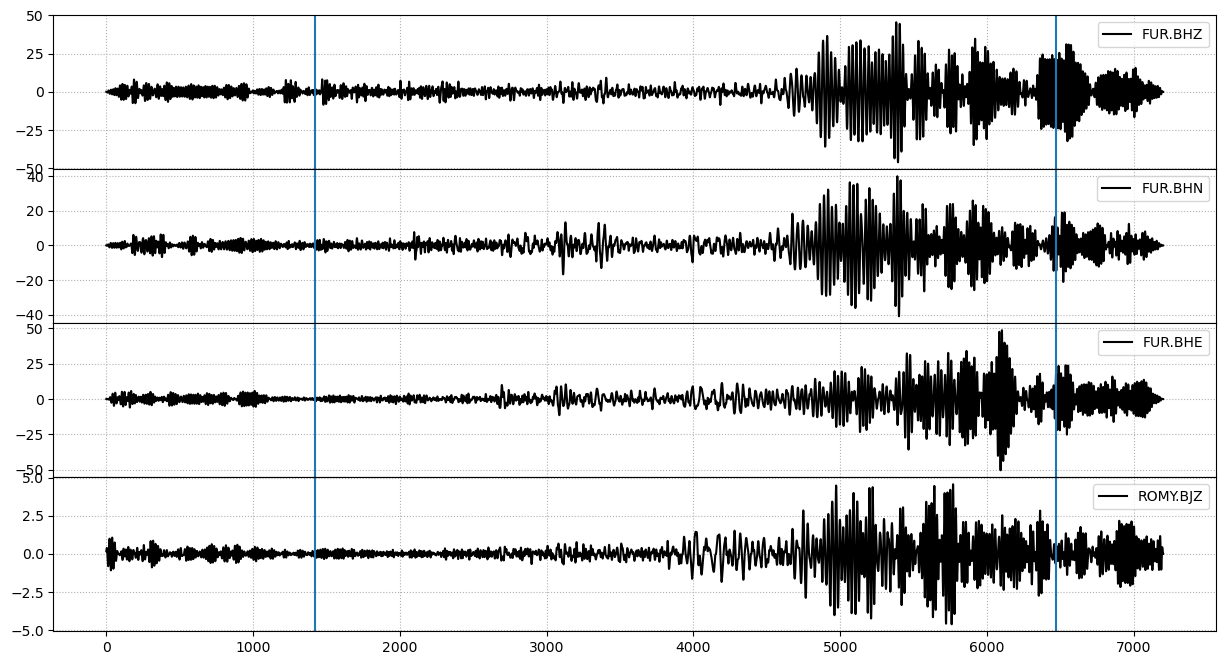

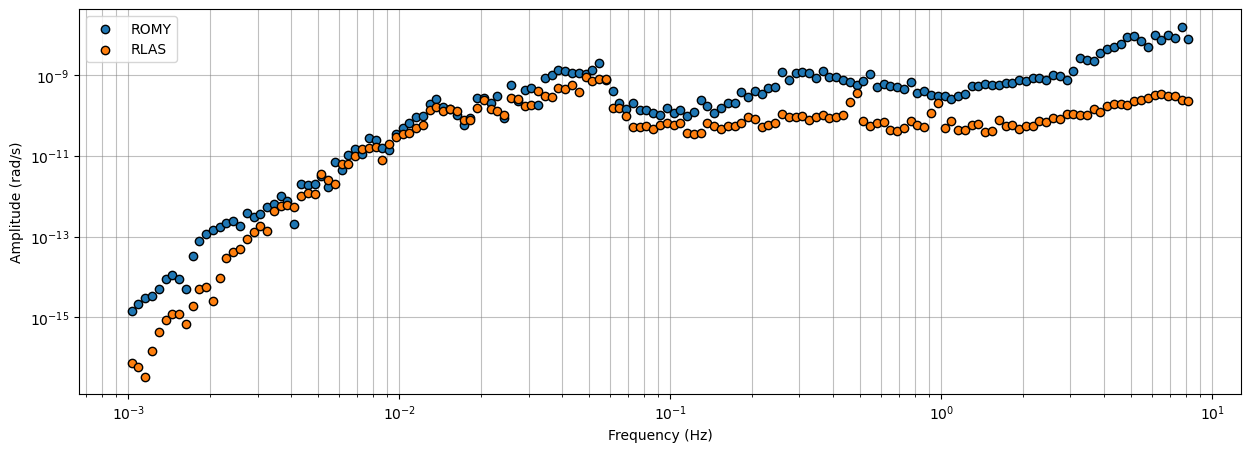

In [286]:

fmin, fmax = 0.001, 8.0

maxima = {}

for _k, (_i, ev) in enumerate(select_z.iterrows()):

    if _k > 10:
        continue

    print(ev.Event.replace("_filtered.png", ".mseed"))

    # specify waveform file name
    wavformfile = ev.Event.replace("_filtered.png", ".mseed")

    # load waveform data
    st0 = obs.read(config['path_to_mseed']+wavformfile)

    st0 = st0.detrend("demean")

    # get window of event
    t1, t2 = __get_event_window(st0, deltaT1=60, deltaT2=1000, plot=True)

    # get maxima for fbands
    out = __get_fband_maxima(st0, fmin, fmax, t1, t2, plot=True)

    # add maxima to dict
    maxima[_i] = out


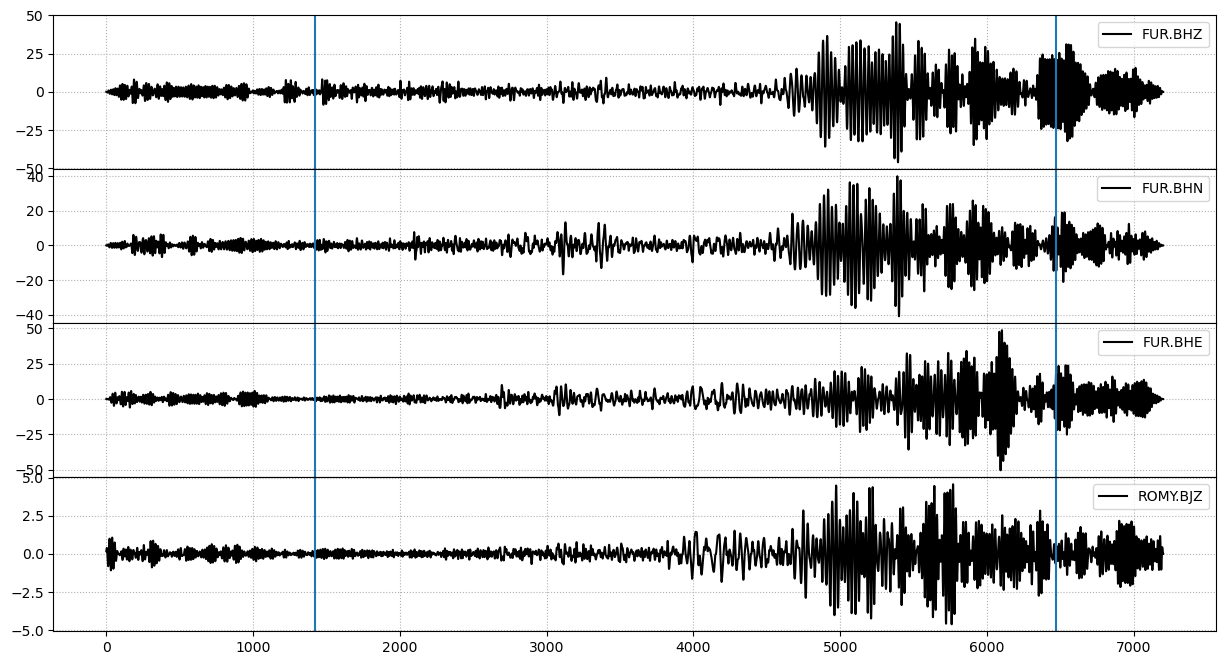

In [279]:
t1, t2 = __get_event_window(st0, deltaT1=60, deltaT2=1000, plot=True)

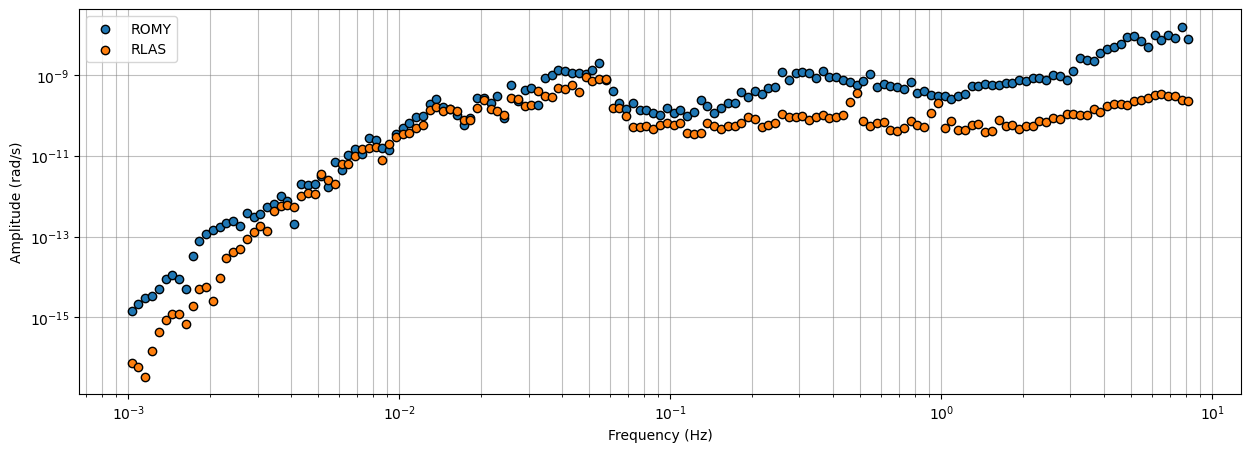

In [280]:
fmin, fmax = 0.001, 8.0


out = __get_fband_maxima(st0, fmin, fmax, t1, t2, plot=True)



In [281]:
def __makeplot():

    deltaT = 600 # seconds

    Nrow, Ncol = len(st_trig), 1

    font = 12

    fig, ax = plt.subplots(Nrow, Ncol, figsize=(15, 8), sharex=True)

    plt.subplots_adjust(hspace=0)

    for _k, tr in enumerate(st_trig):

        if "ROMY" in tr.stats.station:
            ax[_k].plot(tr.times(), tr.data*1e9, color="k", label=f"{tr.stats.station}.{tr.stats.channel}")
        else:
            ax[_k].plot(tr.times(), tr.data*1e6, color="k", label=f"{tr.stats.station}.{tr.stats.channel}")

        ax[_k].axvline(trig[0]['time']-tr.stats.starttime, -10, 10)
        ax[_k].axvline(trig[0]['time']-tr.stats.starttime + trig[0]['duration']+deltaT, -10, 10)


    for _n in range(Nrow):
        ax[_n].grid(ls=":", zorder=0)
        ax[_n].legend(loc=1)

    plt.show();
    return fig

# fig = __makeplot();a
